In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.Concatenate all data files

In [2]:
def Data_Files(path):
    filelist = []
    for dirpath, dirnames, filenames in os.walk(path):
        for name in filenames:
            filelist.append(os.path.join(dirpath,name))
    print("The number of files：",len(filelist))
    return filelist

In [3]:
csv_list = Data_Files('csvs_per_year/csvs_per_year/')

The number of files： 18


## Raw Data

In [4]:
dataset = []
col_diff = {}
for filename in  csv_list:
    data_single = pd.read_csv(filename)
    col_vab = data_single.columns.values.tolist()

    #data_single = data_single.dropna(axis=[0,1])
    dataset.append(data_single)
    dic_vab = {filename.split('/')[-1]:col_vab}
    col_diff.update(dic_vab)

In [5]:
data_raw = pd.concat(dataset,sort=False)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808224 entries, 0 to 69095
Data columns (total 19 columns):
date       object
BEN        float64
CO         float64
EBE        float64
MXY        float64
NMHC       float64
NO_2       float64
NOx        float64
OXY        float64
O_3        float64
PM10       float64
PXY        float64
SO_2       float64
TCH        float64
TOL        float64
station    int64
PM25       float64
NO         float64
CH4        float64
dtypes: float64(17), int64(1), object(1)
memory usage: 581.1+ MB


In [6]:
pd.DataFrame.from_dict(col_diff, orient='index')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
madrid_2001.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,None
madrid_2002.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,None
madrid_2003.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,None
madrid_2004.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
madrid_2005.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
madrid_2006.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
madrid_2007.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
madrid_2008.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
madrid_2009.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
madrid_2010.csv,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station


In [7]:
data_raw.columns.values

array(['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY',
       'O_3', 'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'PM25',
       'NO', 'CH4'], dtype=object)

In [8]:
station_name_raw = data_raw.station.unique()
print(len(station_name_raw))

39


## Wanted test data

In [9]:
dataset = []
#col_diff = {}
for filename in  csv_list:
    data_single = pd.read_csv(filename)
    #col_vab = data_single.columns.values.tolist()

    data_single = data_single.dropna(axis=[0,1])
    dataset.append(data_single)
    dic_vab = {filename.split('/')[-1]:col_vab}
    #col_diff.update(dic_vab)

C:\Users\USER\Anaconda3\envs\tftest\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  import sys


In [10]:
data_wanted = pd.concat(dataset,sort=False)
data_wanted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332026 entries, 1 to 69078
Data columns (total 19 columns):
date       332026 non-null object
BEN        332026 non-null float64
CO         332026 non-null float64
EBE        332026 non-null float64
MXY        241742 non-null float64
NMHC       332026 non-null float64
NO_2       332026 non-null float64
NOx        250431 non-null float64
OXY        241742 non-null float64
O_3        332026 non-null float64
PM10       332026 non-null float64
PXY        241742 non-null float64
SO_2       332026 non-null float64
TCH        332026 non-null float64
TOL        332026 non-null float64
station    332026 non-null int64
PM25       236966 non-null float64
NO         90284 non-null float64
CH4        8689 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 50.7+ MB


In [11]:
station_name_wanted = data_wanted.station.unique()
print(len(station_name_wanted))
print(station_name_wanted)

5
[28079035 28079006 28079024 28079099 28079008]


In [12]:
dropFeatures = ['MXY' , 'OXY' , 'PXY' , 
                'PM25' , 'NO' ,'CH4','NOx']

data_clean=data_wanted.drop(dropFeatures,axis=1)
#data_clean.to_csv('data_clean_remove_some_val.csv',index=False)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332026 entries, 1 to 69078
Data columns (total 12 columns):
date       332026 non-null object
BEN        332026 non-null float64
CO         332026 non-null float64
EBE        332026 non-null float64
NMHC       332026 non-null float64
NO_2       332026 non-null float64
O_3        332026 non-null float64
PM10       332026 non-null float64
SO_2       332026 non-null float64
TCH        332026 non-null float64
TOL        332026 non-null float64
station    332026 non-null int64
dtypes: float64(10), int64(1), object(1)
memory usage: 32.9+ MB


In [13]:
data_clean.columns.values

array(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO_2', 'O_3', 'PM10', 'SO_2',
       'TCH', 'TOL', 'station'], dtype=object)

# 2. Produce missing values

In [14]:
## zero substitute Nan
# data_missing_zero = data_clean.copy()

# data_missing_zero[data_missing_zero == 0] = np.NAN
# data_missing_zero.to_csv('missinig_zero.csv',index=False)

# data_missing_zero.isnull().sum()

## random missing value

In [15]:
random_location = np.random.choice(data_clean.index, size=3000)
variables = data_clean.columns.values[1:-1]
data_missing = data_clean.copy()

In [16]:
for i in range(3000):
    if i % 3 == 0 :
        random_valiables_1 = np.random.choice(variables, size = 1)
        data_missing[random_valiables_1.item()][random_location[i]] = np.NaN
    
    elif i % 3 == 1 :
        random_valiables_1 = np.random.choice(variables, size = 1)
        
        variables_2 = np.delete(variables,np.where(variables==random_valiables_1)[0][0])        
        random_valiables_2 = np.random.choice(variables_2, size = 1)
        
        data_missing[random_valiables_1.item()][random_location[i]] = np.NaN
        data_missing[random_valiables_2.item()][random_location[i]] = np.NaN
    
    else:
        random_valiables_1 = np.random.choice(variables, size = 1)
        
        variables_2 = np.delete(variables,np.where(variables==random_valiables_1)[0][0])
        random_valiables_2 = np.random.choice(variables_2, size = 1)        
        
        variables_3 = np.delete(variables_2,np.where(variables_2==random_valiables_2)[0][0])
        random_valiables_3 = np.random.choice(variables, size = 1)
        
            
        data_missing[random_valiables_1.item()][random_location[i]] = np.NaN
        data_missing[random_valiables_2.item()][random_location[i]] = np.NaN
        data_missing[random_valiables_3.item()][random_location[i]] = np.NaN

C:\Users\USER\Anaconda3\envs\tftest\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\envs\tftest\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\USER\Anaconda3\envs\tftest\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\USER\Anaconda3\envs\tftest\l

In [17]:
data_missing.to_csv('random_nan.csv',index=False)

In [18]:
data_missing.isnull().sum()

date          0
BEN        2144
CO         1991
EBE        2065
NMHC       1656
NO_2       2061
O_3        2113
PM10       1803
SO_2       1967
TCH        1987
TOL        2053
station       0
dtype: int64

# 3.Bulid glrm model

In [19]:
import h2o
import matplotlib.patches as mpatches
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
import os

In [20]:
h2o.init(ip="localhost", port=54323)
h2o.remove_all() # Clean slate - just in case the cluster was already running

Checking whether there is an H2O instance running at http://localhost:54323..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\USER\Anaconda3\envs\tftest\h2o_jar\h2o.jar
  Ice root: C:\Users\USER\AppData\Local\Temp\tmprh1063l6
  JVM stdout: C:\Users\USER\AppData\Local\Temp\tmprh1063l6\h2o_USER_started_from_python.out
  JVM stderr: C:\Users\USER\AppData\Local\Temp\tmprh1063l6\h2o_USER_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,+08:00
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,"1 year, 2 months and 26 days !!!"
H2O cluster name:,H2O_from_python_USER_b3rgu4
H2O cluster total nodes:,1
H2O cluster free memory:,1.745 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


## clean data

In [21]:
# Import madrid data
madrid = h2o.import_file(path=os.path.realpath("data_clean_remove_some_val.csv"))
madrid.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:332026
Cols:12




,date,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL,station
type,time,real,real,real,real,real,real,real,real,real,real,int
mins,978310800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28079006.0
mean,1196107429894.0437,1.5390109818379354,0.5693316196589858,1.8090598931605497,0.17931776421705123,53.43146657026337,39.86343298354962,29.255853820394044,10.725922849097804,1.4119924943083946,7.313226645038594,28079036.932935987
maxs,1525132800000.0,66.38999938964844,11.890000343322756,92.58999633789062,4.809999942779541,554.9000244140625,220.0,367.0,180.3999938964844,6.210000038146973,242.8999938964844,28079099.0
sigma,151565835687.39893,1.9305546941621783,0.5232120780525574,2.2918073476624174,0.13773033290085368,36.58344519165464,30.063021470180253,24.091631342275715,9.469321172390766,0.21572551151719668,9.946089547689818,35.77553475310107
zeros,0,50,871,44,6810,17,10,25,9,280,53,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,2001-08-01 01:00:00,1.5,0.3400000035762787,1.4900000095367432,0.07000000029802322,56.25,42.15999984741211,100.5999984741211,8.109999656677246,1.2400000095367432,10.81999969482422,28079035.0
1,2001-08-01 01:00:00,2.1099998950958248,0.6299999952316284,2.4800000190734863,0.05000000074505806,66.26000213623047,33.5,122.6999969482422,6.360000133514403,1.2300000190734863,13.279999732971191,28079006.0
2,2001-08-01 01:00:00,0.8000000119209291,0.4300000071525574,0.7099999785423279,0.10000000149011612,27.190000534057617,56.9900016784668,114.3000030517578,10.84000015258789,1.4199999570846558,3.4300000667572017,28079024.0


In [22]:
# Plot first row of data on x- vs. y-coordinate features
madrid_row = madrid[1,:].drop(["date",'station'])
madrid_row_np = np.array(h2o.as_list(madrid_row))
x_coords = range(0, madrid_row_np.shape[1], 2)
y_coords = range(1, madrid_row_np.shape[1], 2)

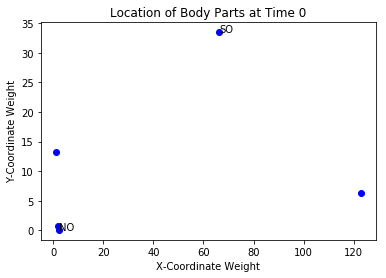

In [23]:
x_pts = madrid_row_np[0,x_coords]
y_pts = madrid_row_np[0,y_coords]
plt.plot(x_pts, y_pts, 'bo')

# Add feature labels to each point
feat_names = [nam[:-2] for nam in madrid_row.col_names[1::3]]
for i in range(len(feat_names)):
    plt.annotate(feat_names[i], xy = [x_pts[i], y_pts[i]])
plt.title("Location of Body Parts at Time 0")
plt.xlabel("X-Coordinate Weight")
plt.ylabel("Y-Coordinate Weight")
plt.show()

In [24]:
madrid_v2=madrid[:,:].drop(["date",'station'])
# Basic GLRM using quadratic loss and no regularization (PCA)
model = H2OGeneralizedLowRankEstimator(k=6, loss="Quadratic", regularization_x="None",
                                       regularization_y="None", max_iterations=1000)
model.train(x=list(range(0,madrid_v2.ncol)), training_frame=madrid_v2)
model.show()

glrm Model Build progress: |██████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  GLRM_model_python_1559559725078_1


ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 758373.548952236
Misclassification Error (Categorical): 0.0
Scoring History: 


,timestamp,duration,iterations,step_size,objective
,2019-06-03 19:02:19,9.098 sec,0.0,0.6666667,758373.5489522
,2019-06-03 19:02:19,9.204 sec,1.0,0.4444444,758373.5489522
,2019-06-03 19:02:19,9.298 sec,2.0,0.2222222,758373.5489522
,2019-06-03 19:02:19,9.388 sec,3.0,0.0740741,758373.5489522
,2019-06-03 19:02:19,9.483 sec,4.0,0.0185185,758373.5489522
,2019-06-03 19:02:19,9.582 sec,5.0,0.0037037,758373.5489522
,2019-06-03 19:02:19,9.673 sec,6.0,0.0006173,758373.5489522
,2019-06-03 19:02:19,9.759 sec,7.0,0.0000882,758373.5489522


               timestamp    duration  iterations  step_size      objective
0    2019-06-03 19:02:19   9.098 sec         0.0   0.666667  758373.548952
1    2019-06-03 19:02:19   9.204 sec         1.0   0.444444  758373.548952
2    2019-06-03 19:02:19   9.298 sec         2.0   0.222222  758373.548952
3    2019-06-03 19:02:19   9.388 sec         3.0   0.074074  758373.548952
4    2019-06-03 19:02:19   9.483 sec         4.0   0.018519  758373.548952
5    2019-06-03 19:02:19   9.582 sec         5.0   0.003704  758373.548952
6    2019-06-03 19:02:19   9.673 sec         6.0   0.000617  758373.548952
7    2019-06-03 19:02:19   9.759 sec         7.0   0.000088  758373.548952


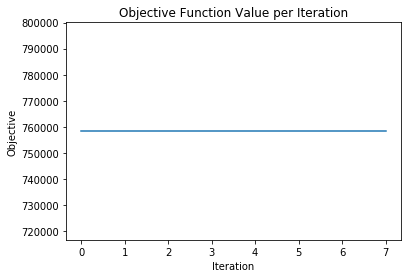

In [25]:
# Plot objective function value each iteration
model_score = model.score_history()
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.title("Objective Function Value per Iteration")
print(model_score)
plt.plot(model_score["iterations"], model_score["objective"])
plt.show()

                ben        co        ebe      nmhc        no_2        o_3  \
0  Arch1   0.798855  0.359587   0.970734  0.121395   41.546414  34.406730   
1  Arch2  14.165429  3.973496  15.019272  0.929965  159.282491   6.530944   
2  Arch3   6.788031  1.970698   7.658808  0.464872  119.221809   8.790282   
3  Arch4   0.467017  0.274421   0.684786  0.142486   19.032786  79.180150   
4  Arch5   3.688472  1.124767   4.278868  0.262152   95.152267  16.114650   
5  Arch6   1.618146  0.623528   1.827059  0.198829   74.295637  21.917493   

         pm10       so_2       tch        tol  
0   17.728678   7.850751  1.340320   3.615915  
1  133.336650  56.735379  2.465314  67.917685  
2   79.084014  33.616435  1.869080  33.981335  
3   19.498187   5.611241  1.296690   1.679162  
4   50.708706  19.218142  1.558586  18.572188  
5   35.428632  11.694632  1.471599   7.756235  


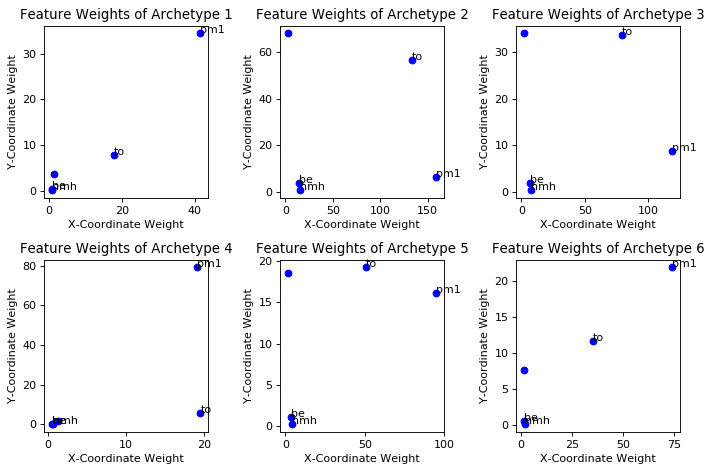

In [27]:
# Archetype to feature mapping (Y)
madrid_y = model._model_json["output"]["archetypes"]
print(madrid_y.as_data_frame())

madrid_y_np = np.array(model.archetypes())
x_coords = range(0, madrid_y_np.shape[1], 2)
y_coords = range(1, madrid_y_np.shape[1], 2)

plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot archetypes on x- vs. y-coordinate features
for k in range(madrid_y_np.shape[0]):
    plt.subplot(2,3,k+1)
    x_pts = madrid_y_np[k, x_coords]
    y_pts = madrid_y_np[k, y_coords]
    plt.plot(x_pts, y_pts, 'bo')

    # Add feature labels to each point
    feat_names = [nam[:-1] for nam in madrid_y.col_header[1::3]]
    for i in range(len(feat_names)):
        plt.annotate(feat_names[i], xy = [x_pts[i], y_pts[i]])
    plt.title("Feature Weights of Archetype " + str(k+1))
    plt.xlabel("X-Coordinate Weight")
    plt.ylabel("Y-Coordinate Weight")
    plt.tight_layout()
plt.show()

Arch1,Arch2,Arch3,Arch4,Arch5,Arch6
-10.6741,0.523212,0.584066,3.2763,-4.81487,9.99479
-13.8523,0.968119,-0.207264,3.91661,-5.55187,13.0028
-12.2642,0.489694,3.03547,3.87902,-11.3059,14.7898
-11.06,0.572405,1.18422,3.50814,-6.7647,11.3713
-5.17673,0.150157,0.600447,2.11779,-2.38758,4.52481
-7.08863,0.63464,-1.25436,2.3327,-0.405253,5.29982
-7.14113,0.176729,2.23507,2.37515,-7.15992,9.08731
-6.22835,0.181694,0.625777,2.33168,-2.64344,5.40747
-2.60638,-0.0157406,0.304266,1.59866,-0.406893,1.42091
-5.71995,0.386665,-1.03722,2.03119,0.350893,3.79992


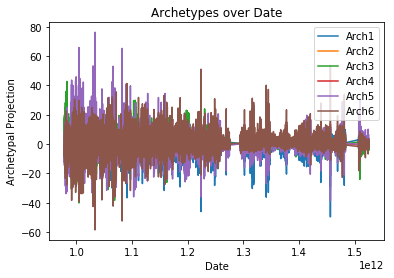

In [28]:
# Projection into archetype space (X)
x_key = model._model_json["output"]["representation_name"]
madrid_x = h2o.get_frame(x_key)
madrid_x.show()

#time_np = np.array(h2o.as_list(madrid["date"]))
time_np = np.array(h2o.as_list(madrid["date"])).astype('timedelta64[s]')
madrid_x_np = np.array(h2o.as_list(madrid_x))

# Plot archetypes over time
lines = []
for i in range(madrid_x_np.shape[1]):
    lines += plt.plot(time_np, madrid_x_np[:,i], '-')
plt.title("Archetypes over Date")
plt.xlabel("Date")
plt.ylabel("Archetypal Projection")
plt.legend(lines, madrid_x.col_names)
plt.show()

In [29]:
# Reconstruct data from X and Y
pred = model.predict(madrid_v2)
pred.head()

glrm prediction progress: |███████████████████████████████████████████████| 100%


reconstr_BEN,reconstr_CO,reconstr_EBE,reconstr_NMHC,reconstr_NO_2,reconstr_O_3,reconstr_PM10,reconstr_SO_2,reconstr_TCH,reconstr_TOL
2.79274,1.10724,1.87225,0.654163,56.282,42.1784,100.544,8.2558,-0.472886,10.3868
3.63258,1.39511,2.18937,0.81034,66.3039,33.5284,122.622,6.55166,-1.00671,12.9397
1.78651,1.0876,-0.00054902,0.907189,27.2267,57.0155,114.233,10.9909,-0.383811,3.31379
2.39888,1.07545,1.16355,0.727626,40.7845,51.6024,102.138,8.11837,-0.459843,7.57951
1.57176,0.635502,1.32992,0.365857,29.7267,56.5287,56.2604,6.97746,0.23757,6.19273
2.98308,0.989715,2.59025,0.426456,56.6239,43.5537,72.4482,5.46908,-0.0885603,12.3439
1.37511,0.803758,0.433343,0.604741,37.0012,46.9544,78.9118,11.0986,0.335186,3.62816
1.93477,0.753856,1.64107,0.418199,39.3815,52.9328,66.2922,7.96758,0.13064,7.84617
1.30529,0.466869,1.51357,0.214042,22.7592,64.0623,36.6347,6.64091,0.566293,5.99423
2.25882,0.75696,2.14599,0.319975,54.6502,46.3718,60.1451,4.74347,0.120699,9.73283


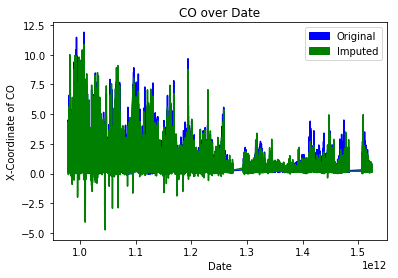

In [30]:
# Plot original and reconstructed CO over time
co_np = np.array(h2o.as_list(madrid_v2["CO"]))
co_pred_np = np.array(h2o.as_list(pred["reconstr_CO"]))
line_orig = plt.plot(time_np, co_np, '-', color='blue')
line_imp = plt.plot(time_np, co_pred_np, '-', color='green')

plt.title("CO over Date")
plt.xlabel("Date")
plt.ylabel("X-Coordinate of CO")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label='Imputed')
plt.legend([blue_patch, green_patch], ["Original", "Imputed"])
plt.show()

## Missing data

### random missing

In [31]:
# Import madrid data with missing values
madrid_miss = h2o.import_file(path = os.path.realpath("random_nan.csv"))
madrid_miss.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:332026
Cols:12




,date,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL,station
type,time,real,real,real,real,real,real,real,real,real,real,int
mins,978310800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28079006.0
mean,1196107429894.0444,1.5408957452940921,0.569779297176585,1.8113704955664947,0.1793790597886619,53.45804842771187,39.8485974478999,29.267007387680692,10.736331958469552,1.412001854063462,7.323238356058171,28079036.932935968
maxs,1525132800000.0,66.38999938964844,11.890000343322756,92.58999633789062,4.809999942779541,554.9000244140625,220.0,367.0,180.3999938964844,6.210000038146973,242.8999938964844,28079099.0
sigma,151565835687.4001,1.9325278231398269,0.523660797063137,2.2940603192100473,0.13782615166556486,36.59577554763512,30.055128077331798,24.100735466639534,9.475040810527961,0.2157748576244349,9.954681870543448,35.77553475257955
zeros,0,50,868,44,6787,17,10,25,9,279,52,0
missing,0,2144,1991,2065,1656,2061,2113,1803,1967,1987,2053,0
0,2001-08-01 01:00:00,1.5,0.3400000035762787,1.4900000095367432,0.07000000029802322,56.25,42.15999984741211,100.5999984741211,8.109999656677246,1.2400000095367432,10.81999969482422,28079035.0
1,2001-08-01 01:00:00,2.1099998950958248,0.6299999952316284,2.4800000190734863,0.05000000074505806,66.26000213623047,33.5,122.6999969482422,6.360000133514403,1.2300000190734863,13.279999732971191,28079006.0
2,2001-08-01 01:00:00,0.8000000119209291,0.4300000071525574,0.7099999785423279,0.10000000149011612,27.190000534057617,56.9900016784668,114.3000030517578,10.84000015258789,1.4199999570846558,3.4300000667572017,28079024.0


In [32]:
madrid_miss = madrid_miss[:,:].drop(["date",'station'])
madrid_miss.describe()

Rows:332026
Cols:10




,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL
type,real,real,real,real,real,real,real,real,real,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.5408957452940921,0.569779297176585,1.8113704955664947,0.1793790597886619,53.45804842771187,39.8485974478999,29.267007387680692,10.736331958469552,1.412001854063462,7.323238356058171
maxs,66.38999938964844,11.890000343322756,92.58999633789062,4.809999942779541,554.9000244140625,220.0,367.0,180.3999938964844,6.210000038146973,242.8999938964844
sigma,1.9325278231398269,0.523660797063137,2.2940603192100473,0.13782615166556486,36.59577554763512,30.055128077331798,24.100735466639534,9.475040810527961,0.2157748576244349,9.954681870543448
zeros,50,868,44,6787,17,10,25,9,279,52
missing,2144,1991,2065,1656,2061,2113,1803,1967,1987,2053
0,1.5,0.3400000035762787,1.4900000095367432,0.07000000029802322,56.25,42.15999984741211,100.5999984741211,8.109999656677246,1.2400000095367432,10.81999969482422
1,2.1099998950958248,0.6299999952316284,2.4800000190734863,0.05000000074505806,66.26000213623047,33.5,122.6999969482422,6.360000133514403,1.2300000190734863,13.279999732971191
2,0.8000000119209291,0.4300000071525574,0.7099999785423279,0.10000000149011612,27.190000534057617,56.9900016784668,114.3000030517578,10.84000015258789,1.4199999570846558,3.4300000667572017


In [33]:
# Basic GLRM using quadratic loss and no regularization
model3 = H2OGeneralizedLowRankEstimator(k=6,  loss="Quadratic", regularization_x="None", 
                                        regularization_y="None", max_iterations=2000, min_step_size=1e-6)
model3.train(x=list(range(0,madrid_miss.ncol)), training_frame=madrid_miss, validation_frame=madrid_v2)
model3.show()

glrm Model Build progress: |██████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  GLRM_model_python_1559559725078_3


ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 217741.03173693237
Misclassification Error (Categorical): 0.0

ModelMetricsGLRM: glrm
** Reported on validation data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 4240935.468536874
Misclassification Error (Categorical): 0.0
Scoring History: 


,timestamp,duration,iterations,step_size,objective
,2019-06-03 19:07:21,5.376 sec,0.0,0.6666667,1739217695.3730359
,2019-06-03 19:07:21,5.471 sec,1.0,0.4444444,1739217695.3730359
,2019-06-03 19:07:21,5.552 sec,2.0,0.2222222,1739217695.3730359
,2019-06-03 19:07:21,5.636 sec,3.0,0.0740741,1739217695.3730359
,2019-06-03 19:07:21,5.718 sec,4.0,0.0185185,1739217695.3730359
---,---,---,---,---,---
,2019-06-03 19:08:58,1 min 42.612 sec,995.0,0.0001465,217742.8875804
,2019-06-03 19:08:58,1 min 42.707 sec,996.0,0.0001539,217741.9805486
,2019-06-03 19:08:58,1 min 42.813 sec,997.0,0.0001616,217741.2494055
,2019-06-03 19:08:59,1 min 42.920 sec,998.0,0.0001696,217741.0317369



See the whole table with table.as_data_frame()


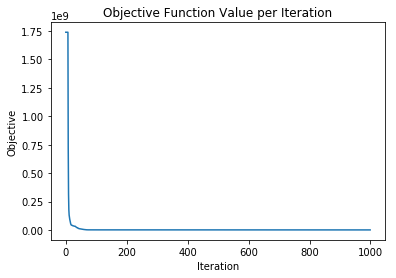

In [34]:
# Plot objective function value each iteration
model3_score = model3.score_history()
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.title("Objective Function Value per Iteration")
plt.plot(model3_score["iterations"], model3_score["objective"])
plt.show()

In [35]:
# Impute missing data from X and Y
pred3 = model3.predict(madrid_miss)
pred3.head()

glrm prediction progress: |███████████████████████████████████████████████| 100%


reconstr_BEN,reconstr_CO,reconstr_EBE,reconstr_NMHC,reconstr_NO_2,reconstr_O_3,reconstr_PM10,reconstr_SO_2,reconstr_TCH,reconstr_TOL
1.7791,0.795329,1.38058,0.267494,56.2465,42.1576,100.598,8.09284,1.47153,10.7878
2.35582,0.927727,2.38442,0.306181,66.2564,33.4969,122.698,6.3453,1.51399,13.2538
0.92716,0.64697,0.661752,0.256375,27.1901,56.9904,114.299,10.8335,1.40232,3.41459
1.46789,0.701314,1.33882,0.254235,40.7481,51.5788,102.199,7.95822,1.42128,7.80798
1.03866,0.486394,0.8113,0.177437,29.7091,56.5195,56.2889,6.8883,1.23363,6.46748
2.10966,0.728122,2.25467,0.232182,56.5975,43.5376,72.4888,5.34988,1.39751,12.6561
0.938081,0.577385,0.712481,0.214589,36.9813,46.9413,78.9501,11.0048,1.30953,3.70124
1.42254,0.597324,1.35561,0.206526,39.3589,52.9198,66.3287,7.85563,1.33599,8.07457
0.638445,0.338525,0.727516,0.142752,22.7486,64.0597,36.6485,6.58431,1.20628,2.98354
1.68956,0.615859,1.84737,0.207735,54.6277,46.3583,60.1787,4.63672,1.37519,9.97014


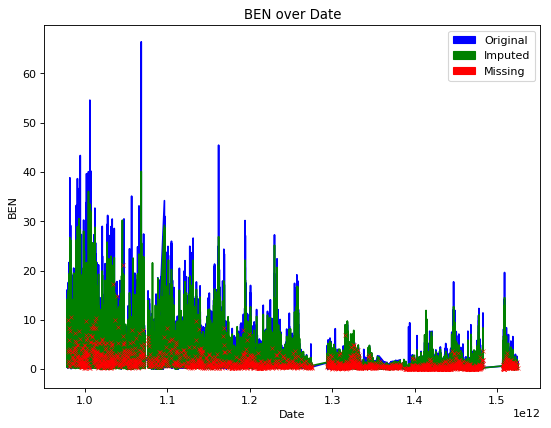

In [36]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed co over date
BEN_np = np.array(h2o.as_list(madrid_v2["BEN"]))
BEN_pred_np3 = np.array(h2o.as_list(pred3["reconstr_BEN"]))
plt.plot(time_np, BEN_np, 'b-')
plt.plot(time_np, BEN_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["BEN"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], BEN_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("BEN over Date")
plt.xlabel("Date")
plt.ylabel("BEN")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('BEN.png')
plt.show()

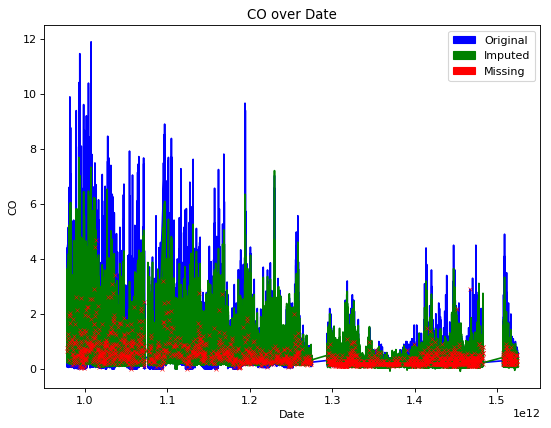

In [37]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed co over date
co_pred_np3 = np.array(h2o.as_list(pred3["reconstr_CO"]))
plt.plot(time_np, co_np, 'b-')
plt.plot(time_np, co_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["CO"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], co_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("CO over Date")
plt.xlabel("Date")
plt.ylabel("CO")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('co.png')
plt.show()

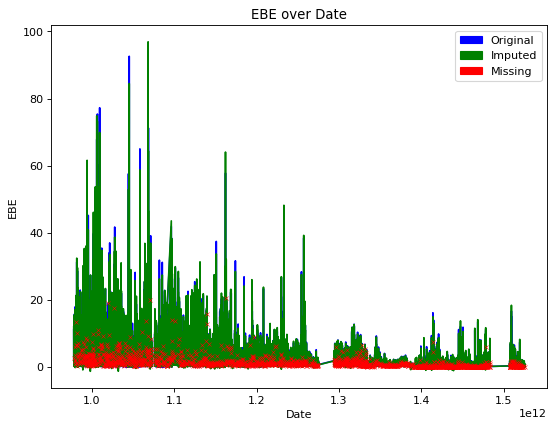

In [38]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed EBE over date
EBE_np = np.array(h2o.as_list(madrid_v2["EBE"]))
EBE_pred_np3 = np.array(h2o.as_list(pred3["reconstr_EBE"]))
plt.plot(time_np, EBE_np, 'b-')
plt.plot(time_np, EBE_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["EBE"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], EBE_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("EBE over Date")
plt.xlabel("Date")
plt.ylabel("EBE")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('EBE.png')
plt.show()

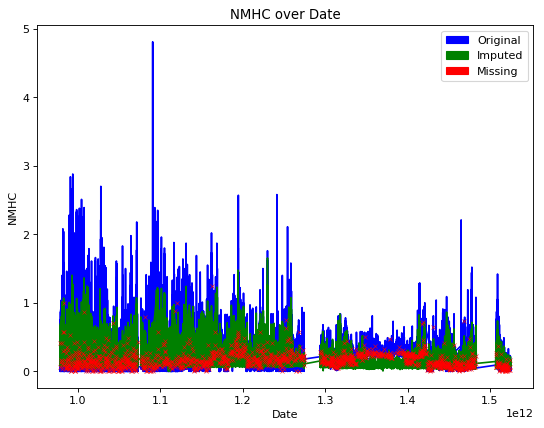

In [39]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed NMHC over date
NMHC_np = np.array(h2o.as_list(madrid_v2["NMHC"]))
NMHC_pred_np3 = np.array(h2o.as_list(pred3["reconstr_NMHC"]))
plt.plot(time_np, NMHC_np, 'b-')
plt.plot(time_np, NMHC_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["NMHC"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], NMHC_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("NMHC over Date")
plt.xlabel("Date")
plt.ylabel("NMHC")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('NMHC.png')
plt.show()

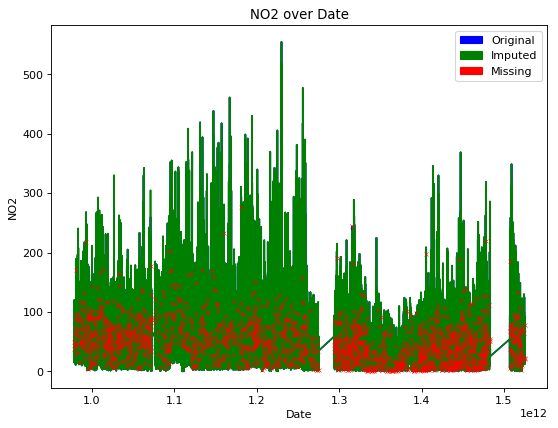

In [40]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed NO_2 over date
NO2_np = np.array(h2o.as_list(madrid_v2["NO_2"]))
NO2_pred_np3 = np.array(h2o.as_list(pred3["reconstr_NO_2"]))
plt.plot(time_np, NO2_np, 'b-')
plt.plot(time_np, NO2_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["NO_2"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], NO2_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("NO2 over Date")
plt.xlabel("Date")
plt.ylabel("NO2")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('NO2.png')
plt.show()

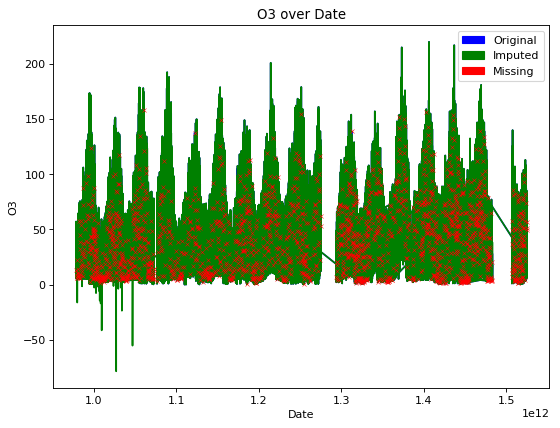

In [41]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed O3 over date
O3_np = np.array(h2o.as_list(madrid_v2["O_3"]))
O3_pred_np3 = np.array(h2o.as_list(pred3["reconstr_O_3"]))
plt.plot(time_np, O3_np, 'b-')
plt.plot(time_np, O3_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["O_3"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], O3_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("O3 over Date")
plt.xlabel("Date")
plt.ylabel("O3")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('O3.png')
plt.show()

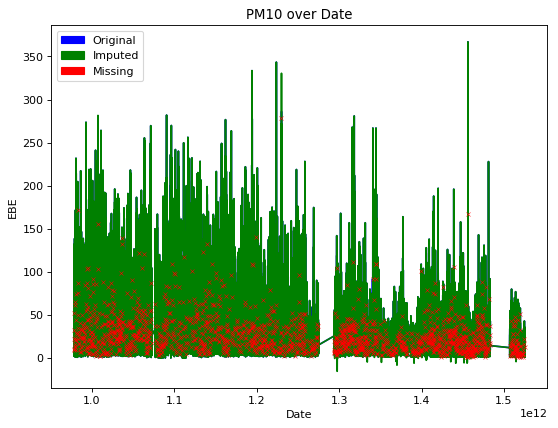

In [42]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed PM10 over date
PM10_np = np.array(h2o.as_list(madrid_v2["PM10"]))
PM10_pred_np3 = np.array(h2o.as_list(pred3["reconstr_PM10"]))
plt.plot(time_np, PM10_np, 'b-')
plt.plot(time_np, PM10_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["PM10"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], PM10_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("PM10 over Date")
plt.xlabel("Date")
plt.ylabel("EBE")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('PM10.png')
plt.show()

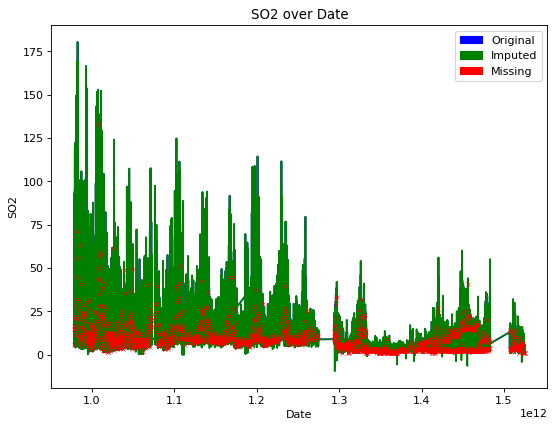

In [43]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed SO2 over date
SO2_np = np.array(h2o.as_list(madrid_v2["SO_2"]))
SO2_pred_np3 = np.array(h2o.as_list(pred3["reconstr_SO_2"]))
plt.plot(time_np, SO2_np, 'b-')
plt.plot(time_np, SO2_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["SO_2"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], SO2_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("SO2 over Date")
plt.xlabel("Date")
plt.ylabel("SO2")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('SO2.png')
plt.show()

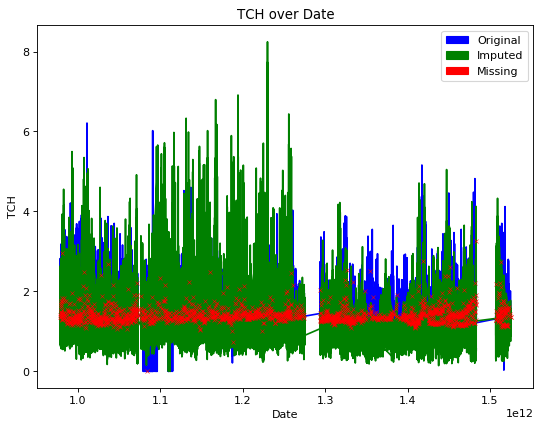

In [44]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed TCH over date
TCH_np = np.array(h2o.as_list(madrid_v2["TCH"]))
TCH_pred_np3 = np.array(h2o.as_list(pred3["reconstr_TCH"]))
plt.plot(time_np, TCH_np, 'b-')
plt.plot(time_np, TCH_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["TCH"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], TCH_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("TCH over Date")
plt.xlabel("Date")
plt.ylabel("TCH")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('TCH.png')
plt.show()

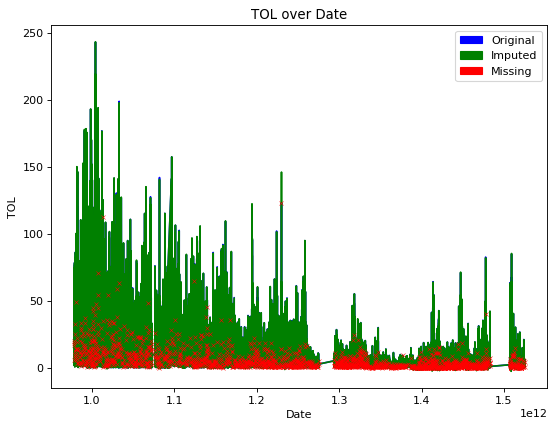

In [45]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot original and imputed TOL over date
TOL_np = np.array(h2o.as_list(madrid_v2["TOL"]))
TOL_pred_np3 = np.array(h2o.as_list(pred3["reconstr_TOL"]))
plt.plot(time_np, TOL_np, 'b-')
plt.plot(time_np, TOL_pred_np3, 'g-')

# Mark points where training data contains missing values
idx_miss = [x[0] for x in madrid_miss["TOL"].isna().which().as_data_frame(True).values.tolist()]
plt.plot(time_np[idx_miss], TOL_np[idx_miss], "o", marker = "x", ms = 4, mew = 0.5, mec = "r")

plt.title("TOL over Date")
plt.xlabel("Date")
plt.ylabel("TOL")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.savefig('TOL.png')
plt.show()

In [46]:
# ### Shut down the cluster
# 
# Shut down the cluster now that we are done using it.
h2o.shutdown(prompt=False)

[WARNING] in <ipython-input-46-d0b11043a337> line 4:
    >>> h2o.shutdown(prompt=False)
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_898d closed.
